In [ ]:
# import zipfile

# # with zipfile.ZipFile("drive/MyDrive/test.zip","r") as z:
# #     z.extractall(".")
# with zipfile.ZipFile(r"D:/Rana shahzad/dataset100.zip", "r") as z:
#     z.extractall(".")

import numpy as np
import tensorflow as tf
from keras.layers import Activation
from tensorflow.keras.optimizers import Adam
# from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
# initializing the path to the dataset
# print(train_path)
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from keras.preprocessing import image as imagess
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_images_path = '/content/drive/MyDrive/RGBthree'
labels = os.listdir(train_images_path)
print(labels)

all_images = []
all_labels = []
plt.figure(figsize=[5, 5])
flag = False
datadir='/content/drive/MyDrive/RGBthree'
for label in labels:
    images_name = os.listdir(train_images_path + "/" + label)
    for file in images_name:
        img = imagess.load_img(train_images_path + "/" + label + "/" + file, grayscale=False, target_size=(224, 224, 3))
        image_array = imagess.img_to_array(img)
        # print(image_array.shape)
        all_images.append(image_array)
        # all_images = np.array(all_images)
        # print(all_images.shape)
        all_labels.append(label)
    print("Appending : ", label)
print("Appended")

print(len(all_images))
print(len(all_labels))
all_images = np.array(all_images)
print(np.array(all_labels).shape)
single_image = all_images[0]
print(single_image.shape)
#
# used to determine number of output classes:
num_classes = len(all_labels)
print(num_classes)

['1', '2', '3', '4', '5', '6', '7', '8', '9']
Appending :  1
Appending :  2
Appending :  3
Appending :  4
Appending :  5
Appending :  6
Appending :  7
Appending :  8
Appending :  9
Appended
442
442
(442,)
(224, 224, 3)
442


<Figure size 360x360 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2

In [ ]:
eg_lambda = 0.001
dropout = True

# load = 1
# time_steps = 1000
# subsample = 50
input_shape = (224, 224, 3)
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(9))
model.add(Activation('softmax'))

adam = Adam(lr=0.0001)
#
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['mse', 'accuracy', tf.keras.metrics.AUC(),
                                                                        tf.keras.metrics.BinaryAccuracy(),
                                                                        'binary_crossentropy',
                                                                        tf.keras.metrics.Precision(),
                                                                        tf.keras.metrics.FalseNegatives(),
                                                                        tf.keras.metrics.FalsePositives(),
                                                                        tf.keras.metrics.TrueNegatives(),
                                                                        tf.keras.metrics.TruePositives()
                                                                        ])
#
model.summary()
# model.save('/content/drive/MyDrive/melware_model_final.h5')
# compiling the structure of the model
# model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# In[10]:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      102464    
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     4

In [ ]:
# model.save('/content/drive/MyDrive/melware_model_final.h5')

y :  (442, 9)
X.shape :   (442, 224, 224, 3)
Y.shape :   (442, 9)
X_train :  397 y_train :  397
X_test :  45 y_test :  45
Epoch 1/15
13/13 [==============================] - 786s 59s/step - loss: 1.7786 - mse: 0.0850 - accuracy: 0.3804 - auc: 0.7819 - binary_accuracy: 0.8914 - binary_crossentropy: 0.7813 - precision: 0.5882 - false_negatives: 367.0000 - false_positives: 21.0000 - true_negatives: 3155.0000 - true_positives: 30.0000 - val_loss: 3.7169 - val_mse: 0.1250 - val_accuracy: 0.1111 - val_auc: 0.5532 - val_binary_accuracy: 0.8543 - val_binary_crossentropy: 1.6323 - val_precision: 0.1111 - val_false_negatives: 43.0000 - val_false_positives: 16.0000 - val_true_negatives: 344.0000 - val_true_positives: 2.0000
Epoch 2/15
13/13 [==============================] - 757s 58s/step - loss: 1.6321 - mse: 0.0799 - accuracy: 0.4307 - auc: 0.8244 - binary_accuracy: 0.8981 - binary_crossentropy: 0.7739 - precision: 0.7089 - false_negatives: 341.0000 - false_positives: 23.0000 - true_negatives: 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

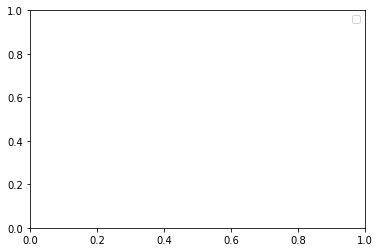

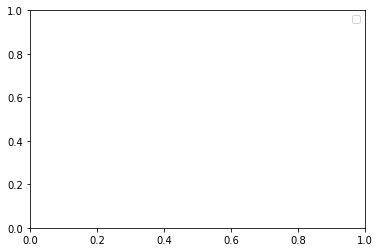

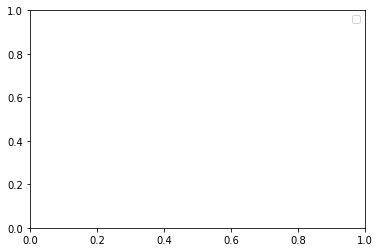

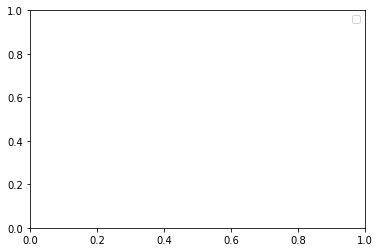

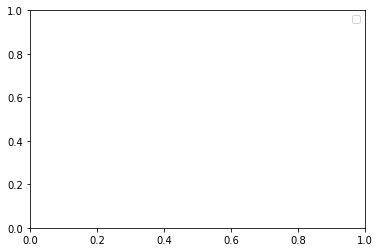

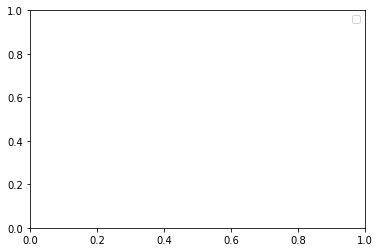

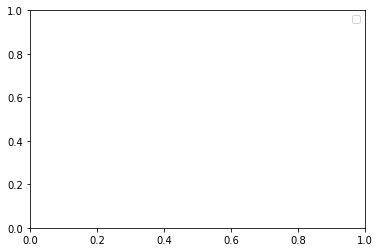

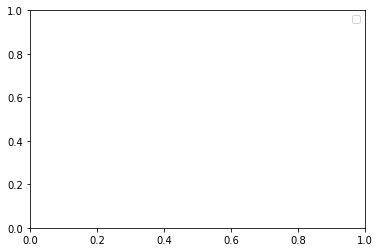

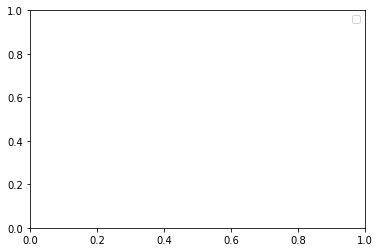

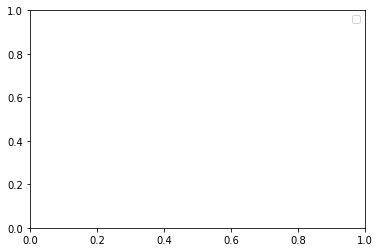

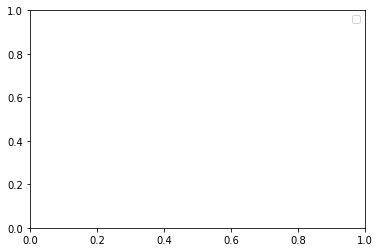

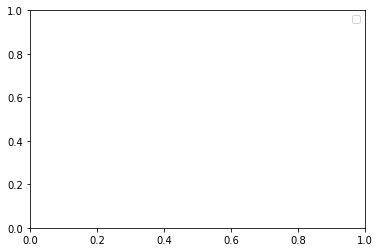

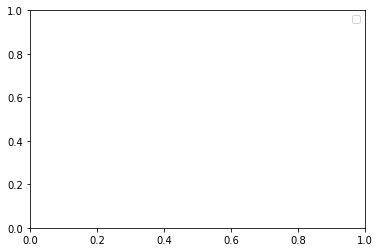

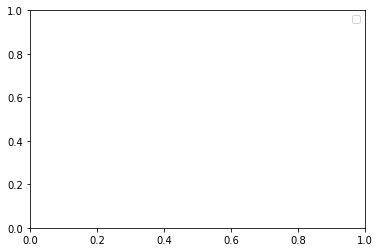

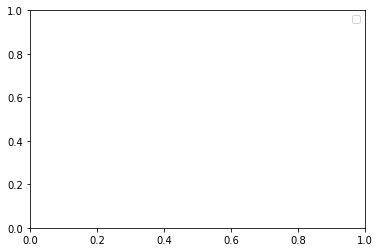

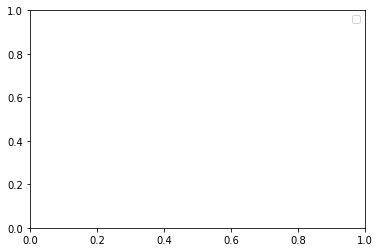

In [ ]:
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y = le.fit_transform(all_labels)
classes = list(le.classes_)
y = np_utils.to_categorical(y, num_classes=len(labels))
print("y : ", y.shape)
X, Y = np.array(all_images), np.array(y)
print("X.shape :  ", X.shape)
print("Y.shape :  ", Y.shape)
# print("len X : ",len(X),"len Y : ",len(Y))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("X_train : ", len(X_train), "y_train : ", len(y_train))
print("X_test : ", len(X_test), "y_test : ", len(y_test))
# y_train = (np.arange(len(all_labels)) == y_train[:])
# y_test = (np.arange(len(all_labels)) == y_test[:])
from keras import backend as K

path_model = '/content/drive/MyDrive/checkpoints' #model.save('/content/drive/MyDrive/melware_model_final.h5')
K.set_value(model.optimizer.lr, 1e-3)  # set the learning rate

checkpoint = ModelCheckpoint(path_model + "melware_model_final.h5", monitor='loss', verbose=1, save_best_only=True, #change model name
                                 mode='auto', save_freq= int(y.size / 100))
#model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# training the model
h = model.fit(x=X_train,
              y=y_train,
              epochs=15,
              validation_data=(X_test, y_test),
              verbose=1,
              shuffle=True,
              callbacks=[checkpoint])
# model.save('/content/drive/MyDrive/melware_model_final2.h5')

accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
auc = h.history['auc']
binary_accuracy = h.history['binary_accuracy']
binary_crossentropy = h.history['binary_crossentropy']
precision = h.history['precision']
false_negatives = h.history['false_negatives']
false_positives = h.history['false_positives']
true_negatives = h.history['true_negatives']
true_positives = h.history['true_positives']
val_binary_accuracy = h.history['val_binary_accuracy']
val_binary_crossentropy = h.history['val_binary_crossentropy']
val_precision = h.history['val_precision']
val_false_negatives = h.history['val_false_negatives']
val_false_positives = h.history['val_false_positives']
val_true_negatives = h.history['val_true_negatives']
val_true_positives = h.history['val_true_positives']
epochs_list = range(len(accuracy))

plt.plot(epochs_list, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_list, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("G:\My Drive\Results\accuracy.png")
plt.clf()

plt.figure()
plt.plot(epochs_list, loss, 'bo', label='Training loss')
plt.plot(epochs_list, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.savefig("G:\My Drive\Results\loss.png")
plt.clf()
plt.legend()

plt.figure()
plt.plot(epochs_list, auc, 'bo', label='auc')
plt.title('auc')
plt.savefig("G:\My Drive\Results\auc.png")
plt.clf()
plt.legend()

plt.figure()
plt.plot(epochs_list, binary_accuracy, 'bo', label='binary_accuracy')
plt.title('binary_accuracy')
plt.savefig("G:\My Drive\Results\binary_accuracy.png")
plt.clf()
plt.legend()

plt.figure()
plt.plot(epochs_list, binary_crossentropy, 'bo', label='binary_crossentropy')
plt.title('binary_crossentropy')
plt.savefig("G:\My Drive\Results\binary_crossentropy.png")
plt.clf()
plt.legend()

plt.figure()
plt.plot(epochs_list, precision, 'bo', label='precision')
plt.title('precision')
plt.savefig("G:\My Drive\Results\precision.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, false_negatives, 'bo', label='false_negatives')
plt.title('false_negatives')
plt.savefig("G:\My Drive\Results\false_negatives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, false_positives, 'bo', label='false_positives')
plt.title('false_positives')
plt.savefig("G:\My Drive\Results\false_positives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, true_negatives, 'bo', label='true_negatives')
plt.title('true_negatives')
plt.savefig("G:\My Drive\Results\true_negatives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, true_positives, 'bo', label='true_positives')
plt.title('true_positives')
plt.savefig("G:\My Drive\Results\true_positives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_binary_accuracy, 'bo', label='val_binary_accuracy')
plt.title('val_binary_accuracy')
plt.savefig("G:\My Drive\Results\val_binary_accuracy.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_binary_crossentropy, 'bo', label='val_binary_crossentropy')
plt.title('val_binary_crossentropy')
plt.savefig("G:\My Drive\Results\val_binary_crossentropy.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_precision, 'bo', label='val_precision')
plt.title('val_precision')
plt.savefig("G:\My Drive\Results\val_precision.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_false_negatives, 'bo', label='val_false_negatives')
plt.title('val_false_negatives')
plt.savefig("G:\My Drive\Results\val_false_negatives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_false_positives, 'bo', label='val_false_positives')
plt.title('val_false_positives')
plt.savefig("G:\My Drive\Results\val_false_positives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_true_negatives, 'bo', label='val_true_negatives')
plt.title('val_true_negatives')
plt.savefig("G:\My Drive\Results\val_true_negatives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_true_positives, 'bo', label='val_true_positives')
plt.title('val_true_positives')
plt.savefig("G:\My Drive\Results\val_true_positives.png")
plt.clf()
plt.legend()
#
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True,rankdir="TR",expand_nested=True, show_layer_names=True,show_dtype= True)
#
# from google.colab import drive
# drive.mount('/content/drive')
#
# !pip install visualkeras
#
# import visualkeras
# visualkeras.layered_view(model)


In [ ]:
h.history


{'accuracy': [0.380352646112442,
  0.4307304918766022,
  0.42065492272377014,
  0.4710327386856079,
  0.47858941555023193,
  0.508816123008728,
  0.5365239381790161,
  0.5289672613143921,
  0.5818639993667603,
  0.5944584608078003,
  0.6372795701026917,
  0.6599496006965637,
  0.6977329850196838,
  0.735516369342804,
  0.75314861536026],
 'auc': [0.7818894386291504,
  0.824415922164917,
  0.8180283308029175,
  0.8454554080963135,
  0.850271463394165,
  0.8777846097946167,
  0.8745847940444946,
  0.8926350474357605,
  0.9121230840682983,
  0.9107728004455566,
  0.9303632974624634,
  0.9351515769958496,
  0.9482476711273193,
  0.9658601880073547,
  0.9675878882408142],
 'binary_accuracy': [0.89140784740448,
  0.8981248140335083,
  0.9023228883743286,
  0.9034424424171448,
  0.906241238117218,
  0.9135180115699768,
  0.9143576622009277,
  0.9233137369155884,
  0.9305905699729919,
  0.9286313056945801,
  0.9364678859710693,
  0.9440246820449829,
  0.9445844888687134,
  0.9496220946311951,


In [ ]:
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
auc = h.history['auc_2']
binary_accuracy = h.history['binary_accuracy']
binary_crossentropy = h.history['binary_crossentropy']
precision = h.history['precision_2']
false_negatives = h.history['false_negatives_2']
false_positives = h.history['false_positives_2']
true_negatives = h.history['true_negatives_2']
true_positives = h.history['true_positives_2']
val_binary_accuracy = h.history['val_binary_accuracy']
val_binary_crossentropy = h.history['val_binary_crossentropy']
val_precision = h.history['val_precision_2']
val_false_negatives = h.history['val_false_negatives_2']
val_false_positives = h.history['val_false_positives_2']
val_true_negatives = h.history['val_true_negatives_2']
val_true_positives = h.history['val_true_positives_2']
epochs_list = range(len(accuracy))

plt.plot(epochs_list, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_list, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("G:\My Drive\Results\accuracy.png")
plt.clf()

plt.figure()
plt.plot(epochs_list, loss, 'bo', label='Training loss')
plt.plot(epochs_list, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.savefig("G:\My Drive\Results\loss.png")
plt.clf()
plt.legend()

plt.figure()
plt.plot(epochs_list, auc, 'bo', label='auc')
plt.title('auc')
plt.savefig("G:\My Drive\Results\auc.png")
plt.clf()
plt.legend()

plt.figure()
plt.plot(epochs_list, binary_accuracy, 'bo', label='binary_accuracy')
plt.title('binary_accuracy')
plt.savefig("G:\My Drive\Results\binary_accuracy.png")
plt.clf()
plt.legend()

plt.figure()
plt.plot(epochs_list, binary_crossentropy, 'bo', label='binary_crossentropy')
plt.title('binary_crossentropy')
plt.savefig("G:\My Drive\Results\binary_crossentropy.png")
plt.clf()
plt.legend()

plt.figure()
plt.plot(epochs_list, precision, 'bo', label='precision')
plt.title('precision')
plt.savefig("G:\My Drive\Results\precision.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, false_negatives, 'bo', label='false_negatives')
plt.title('false_negatives')
plt.savefig("G:\My Drive\Results\false_negatives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, false_positives, 'bo', label='false_positives')
plt.title('false_positives')
plt.savefig("G:\My Drive\Results\false_positives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, true_negatives, 'bo', label='true_negatives')
plt.title('true_negatives')
plt.savefig("G:\My Drive\Results\true_negatives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, true_positives, 'bo', label='true_positives')
plt.title('true_positives')
plt.savefig("G:\My Drive\Results\true_positives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_binary_accuracy, 'bo', label='val_binary_accuracy')
plt.title('val_binary_accuracy')
plt.savefig("G:\My Drive\Results\val_binary_accuracy.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_binary_crossentropy, 'bo', label='val_binary_crossentropy')
plt.title('val_binary_crossentropy')
plt.savefig("G:\My Drive\Results\val_binary_crossentropy.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_precision, 'bo', label='val_precision')
plt.title('val_precision')
plt.savefig("G:\My Drive\Results\val_precision.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_false_negatives, 'bo', label='val_false_negatives')
plt.title('val_false_negatives')
plt.savefig("G:\My Drive\Results\val_false_negatives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_false_positives, 'bo', label='val_false_positives')
plt.title('val_false_positives')
plt.savefig("G:\My Drive\Results\val_false_positives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_true_negatives, 'bo', label='val_true_negatives')
plt.title('val_true_negatives')
plt.savefig("G:\My Drive\Results\val_true_negatives.png")
plt.clf()
plt.legend()
plt.figure()
plt.plot(epochs_list, val_true_positives, 'bo', label='val_true_positives')
plt.title('val_true_positives')
plt.savefig("G:\My Drive\Results\val_true_positives.png")
plt.clf()
plt.legend()

KeyError: ignored